<a href="https://colab.research.google.com/github/montali/LastDuel/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost keras_tuner

In [2]:
import catboost
import pandas as pd
import tensorflow as tf

In [3]:
performances = pd.read_csv("data_for_task.csv", index_col=0).dropna(axis=0)
performances

,id,average_ensemble,average_mlp,ensemble_mlp_diffn,AutoCorrelation,CfsSubsetEval_DecisionStumpAUC,CfsSubsetEval_DecisionStumpErrRate,CfsSubsetEval_DecisionStumpKappa,CfsSubsetEval_NaiveBayesAUC,CfsSubsetEval_NaiveBayesErrRate,...,RandomTreeDepth2AUC,RandomTreeDepth2ErrRate,RandomTreeDepth2Kappa,RandomTreeDepth3AUC,RandomTreeDepth3ErrRate,RandomTreeDepth3Kappa,StdvNominalAttDistinctValues,kNN1NAUC,kNN1NErrRate,kNN1NKappa
0,1,0.958916,0.928211,0.030705,0.606466,0.981204,0.023385,0.941800,0.981204,0.023385,...,0.967172,0.022272,0.943873,0.967172,0.022272,0.943873,1.502523,0.948265,0.030067,0.922629
1,2,0.907264,0.967613,-0.060349,0.606466,0.906774,0.132517,0.619102,0.906774,0.132517,...,0.929700,0.080178,0.795325,0.929700,0.080178,0.795325,1.557606,0.872195,0.063474,0.826110
2,3,0.978562,0.954068,0.024494,0.999061,0.961912,0.059136,0.881192,0.961912,0.059136,...,0.945136,0.054443,0.890850,0.945136,0.054443,0.890850,0.164399,0.972843,0.069149,0.860968
6,9,0.681645,0.757492,-0.075847,0.632353,0.842862,0.360976,0.526012,0.842862,0.360976,...,0.842526,0.268293,0.651436,0.842526,0.268293,0.651436,5.796551,0.825862,0.258537,0.666329
7,10,0.816988,0.814189,0.002799,0.503401,0.792455,0.236486,0.547440,0.792455,0.236486,...,0.757621,0.243243,0.529536,0.757621,0.243243,0.529536,1.591645,0.827738,0.195946,0.623707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19795,29,0.861556,0.834058,0.027498,0.978229,0.877612,0.143478,0.710175,0.877612,0.143478,...,0.767221,0.249275,0.491050,0.767221,0.249275,0.491050,4.049691,0.818419,0.178261,0.638282
19796,41,0.892963,0.787539,0.105425,0.945748,0.962042,0.133236,0.853475,0.962042,0.133236,...,0.903596,0.185944,0.796019,0.903596,0.185944,0.796019,2.884551,0.961616,0.117130,0.871345
19797,2079,0.649642,0.602657,0.046985,0.393197,0.823949,0.418478,0.463731,0.823949,0.418478,...,0.721951,0.476902,0.391513,0.721951,0.476902,0.391513,7.659417,0.701815,0.466033,0.402286
19798,3021,0.964784,0.925303,0.039481,0.886502,0.928864,0.025186,0.775972,0.928864,0.025186,...,0.785261,0.036585,0.652262,0.785261,0.036585,0.652262,0.668312,0.789559,0.041092,0.615379


In [4]:
X = performances.drop(["average_ensemble", "average_mlp", "ensemble_mlp_diffn", "id"], axis=1)
y = performances["ensemble_mlp_diffn"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

X_train

,AutoCorrelation,CfsSubsetEval_DecisionStumpAUC,CfsSubsetEval_DecisionStumpErrRate,CfsSubsetEval_DecisionStumpKappa,CfsSubsetEval_NaiveBayesAUC,CfsSubsetEval_NaiveBayesErrRate,CfsSubsetEval_NaiveBayesKappa,CfsSubsetEval_kNN1NAUC,CfsSubsetEval_kNN1NErrRate,CfsSubsetEval_kNN1NKappa,...,RandomTreeDepth2AUC,RandomTreeDepth2ErrRate,RandomTreeDepth2Kappa,RandomTreeDepth3AUC,RandomTreeDepth3ErrRate,RandomTreeDepth3Kappa,StdvNominalAttDistinctValues,kNN1NAUC,kNN1NErrRate,kNN1NKappa
13350,0.505051,0.698990,0.340000,0.326733,0.698990,0.340000,0.326733,0.698990,0.340000,0.326733,...,0.656566,0.340000,0.313131,0.656566,0.340000,0.313131,0.000000,0.571717,0.420000,0.144603
16026,0.827957,0.499478,0.143113,0.000000,0.499478,0.143113,0.000000,0.499478,0.143113,0.000000,...,0.585269,0.220036,0.159727,0.585269,0.220036,0.159727,28.991378,0.585947,0.209302,0.176627
4107,0.503759,0.497497,0.482500,0.000000,0.497497,0.482500,0.000000,0.497497,0.482500,0.000000,...,0.495745,0.502500,-0.008530,0.495745,0.502500,-0.008530,0.000000,0.480376,0.517500,-0.039365
7520,0.968992,0.692493,0.553846,0.307692,0.692493,0.553846,0.307692,0.692493,0.553846,0.307692,...,0.375185,0.992308,-0.240385,0.375185,0.992308,-0.240385,14.849242,0.389423,0.976923,-0.221154
16028,0.998208,0.480769,0.023256,0.000000,0.480769,0.023256,0.000000,0.480769,0.023256,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,28.991378,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11332,0.987694,0.857282,0.069903,0.794653,0.857282,0.069903,0.794653,0.857282,0.069903,0.794653,...,0.801187,0.133333,0.609965,0.801187,0.133333,0.609965,0.000000,0.891914,0.082201,0.765213
12014,0.476190,0.587104,0.418605,0.087264,0.587104,0.418605,0.087264,0.587104,0.418605,0.087264,...,0.591629,0.395349,0.181411,0.591629,0.395349,0.181411,0.000000,0.469457,0.441860,0.066286
5431,0.505051,0.698990,0.340000,0.326733,0.698990,0.340000,0.326733,0.698990,0.340000,0.326733,...,0.656566,0.340000,0.313131,0.656566,0.340000,0.313131,0.000000,0.571717,0.420000,0.144603
889,0.393197,0.823949,0.418478,0.463731,0.823949,0.418478,0.463731,0.823949,0.418478,0.463731,...,0.721951,0.476902,0.391513,0.721951,0.476902,0.391513,7.659417,0.701815,0.466033,0.402286


In [15]:
!pip install ipython ipywidgets

     |████████████████████████████████| 123 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 23.7 MB/s eta 0:00:01
     |████████████████████████████████| 245 kB 72.1 MB/s eta 0:00:01


In [16]:
model = catboost.CatBoostRegressor()
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

randomized_search_result = model.randomized_search(grid,
                                                   X=X_train,
                                                   y=y_train,
                                                   plot=True)
print(f"\n\nCatBoost obtained an R2 score of {model.score(X_test, y_test)}")


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1118647	test: 0.1135184	best: 0.1135184 (0)	total: 15.8ms	remaining: 15.8s
1:	learn: 0.1071629	test: 0.1089039	best: 0.1089039 (1)	total: 23.5ms	remaining: 11.7s
2:	learn: 0.1029809	test: 0.1048729	best: 0.1048729 (2)	total: 30.9ms	remaining: 10.3s
3:	learn: 0.0989186	test: 0.1009379	best: 0.1009379 (3)	total: 37.3ms	remaining: 9.29s
4:	learn: 0.0957124	test: 0.0978592	best: 0.0978592 (4)	total: 46.2ms	remaining: 9.18s
5:	learn: 0.0930339	test: 0.0953487	best: 0.0953487 (5)	total: 57.1ms	remaining: 9.47s
6:	learn: 0.0904449	test: 0.0928868	best: 0.0928868 (6)	total: 67ms	remaining: 9.51s
7:	learn: 0.0879349	test: 0.0904291	best: 0.0904291 (7)	total: 72.1ms	remaining: 8.93s
8:	learn: 0.0859331	test: 0.0884683	best: 0.0884683 (8)	total: 77.7ms	remaining: 8.55s
9:	learn: 0.0842005	test: 0.0868732	best: 0.0868732 (9)	total: 85.6ms	remaining: 8.48s
10:	learn: 0.0826576	test: 0.0853730	best: 0.0853730 (10)	total: 91.9ms	remaining: 8.26s
11:	learn: 0.0813042	test: 0.0841250	best: 

<AxesSubplot:xlabel='feature'>

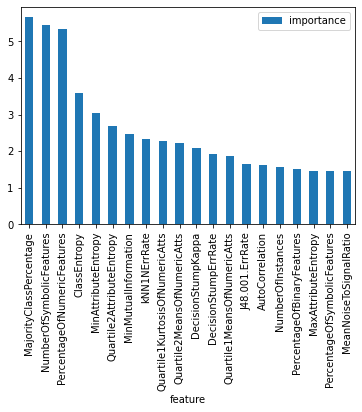

In [8]:
pd.DataFrame(zip(X_train.columns,model.feature_importances_), columns=["feature", "importance"]).sort_values("importance", ascending=False).iloc[:20].plot.bar(x="feature", y="importance")

In [17]:

import tensorflow as tf
from tensorflow import keras

normalizer = keras.layers.Normalization(axis=-1, name='normalizer')
normalizer.adapt(X_train)

In [18]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    normalizer,
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam", )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalizer (Normalization)  (None, 107)               215       
                                                                 
 dense_5 (Dense)             (None, 128)               13824     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)              

In [19]:
hist = model.fit(X_train, y_train, epochs=50, batch_size=50, validation_split=0.2)

Epoch 1/50
253/253 [==============================] - 1s 3ms/step - loss: 0.0496 - val_loss: 0.0285
Epoch 2/50
253/253 [==============================] - 1s 2ms/step - loss: 0.0221 - val_loss: 0.0221
Epoch 3/50
253/253 [==============================] - 1s 3ms/step - loss: 0.0122 - val_loss: 0.0063
Epoch 4/50
253/253 [==============================] - 1s 2ms/step - loss: 0.0055 - val_loss: 0.0042
Epoch 5/50
253/253 [==============================] - 1s 2ms/step - loss: 0.0048 - val_loss: 0.0037
Epoch 6/50
253/253 [==============================] - 1s 2ms/step - loss: 0.0046 - val_loss: 0.0034
Epoch 7/50
253/253 [==============================] - 1s 3ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 8/50
253/253 [==============================] - 1s 2ms/step - loss: 0.0040 - val_loss: 0.0033
Epoch 9/50
253/253 [==============================] - 1s 3ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 10/50
253/253 [==============================] - 1s 3ms/step - loss: 0.0038 - val_loss: 0.0027

In [20]:
!pip install tensorflow-addons

In [7]:
import keras_tuner as kt
import tensorflow_addons as tfa


def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
    model.add(normalizer)
    for n_layer in range(hp.Int('n_layers', 1, 6, default=2)):
        model.add(keras.layers.Dense(hp.Int('n_units_'+str(n_layer), 1, 512), activation=hp.Choice('activation', ['relu', 'sigmoid', 'tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_'+str(n_layer), 0, 0.5, step=0.05)))
    model.add(keras.layers.Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=[tfa.metrics.RSquare(dtype=tf.float32, y_shape=(1,))])
    return model

tuner = kt.Hyperband(build_model,
                        objective=kt.Objective("r_square", "max"),
                        max_epochs=100,
                        directory='/tmp/keras_tuner',
                        project_name='lastduel',
                        overwrite=True)
tuner.search(X_train,
             y_train,
             epochs=10,
             validation_split=0.2,
             callbacks=[tf.keras.callbacks.TensorBoard("/tmp/tb_logs")])


NameError: name 'keras' is not defined

In [22]:
best_model = tuner.get_best_models(num_models=1)[0]

In [25]:
#from google.colab import files

best_model.save('best_model_h5', save_format='h5')
#files.download('best_model_h5')

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, best_model.predict(X_test)), r2_score(y_test, best_model.predict(X_test))

(0.002432233515077433, 0.7373703573101553)